In [33]:
# Exploring the data 
#Step 1 : Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Step 2: Load dataset
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [36]:
# Step 3 : Data Preprocessing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [39]:
# 1.Drop unuseful coloumns  from dataset
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [40]:
# 2. We need to handle null values/missing values with median/ mode for age and Embarked
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df
#df.isnull().sum()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [41]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Text(0, 0.5, 'Count')

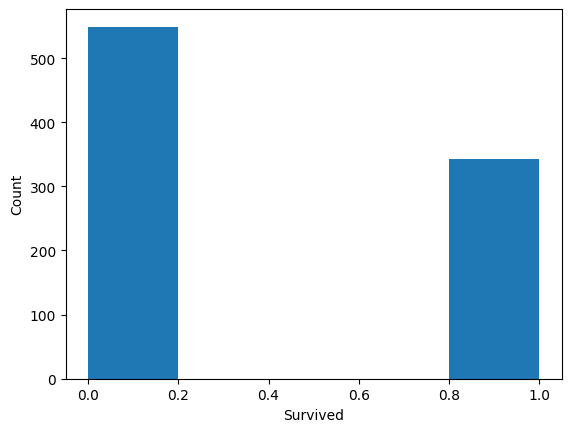

In [42]:
plt.hist(df["Survived"], bins=5)           # Histogram plot using matplotlib
plt.xlabel("Survived")
plt.ylabel("Count")

{'whiskers': [<matplotlib.lines.Line2D at 0x22e973baae0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e98a31790>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e98a31f10>],
 'medians': [<matplotlib.lines.Line2D at 0x22e98a328d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e98a30da0>],
 'means': []}

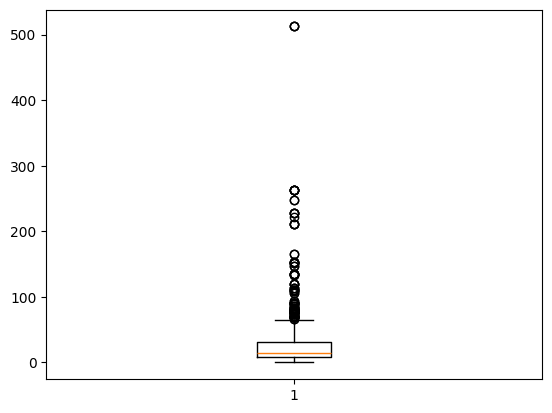

In [43]:
plt.boxplot(df["Fare"])        # Box plot using matplotlib

<Axes: xlabel='Sex', ylabel='count'>

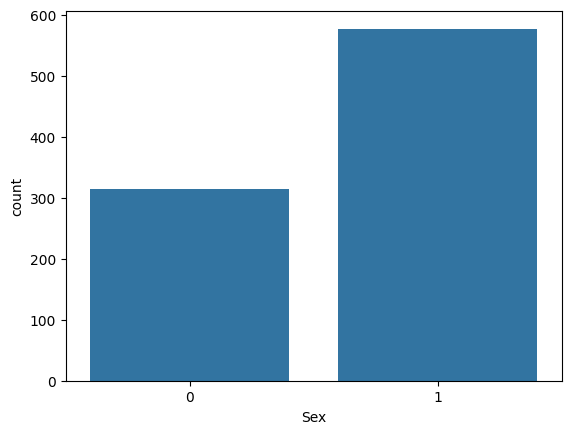

In [44]:
sns.countplot(df, x="Sex")

<Axes: xlabel='Age', ylabel='count'>

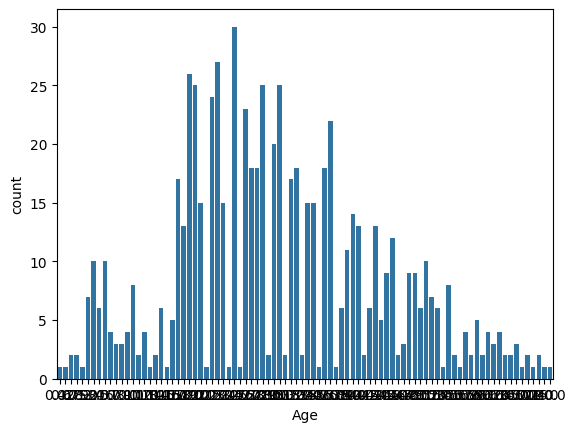

In [11]:
sns.countplot(df, x="Age")

<Axes: xlabel='Age', ylabel='Survived'>

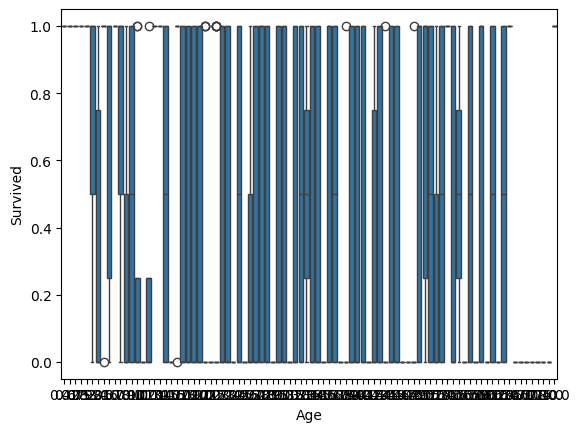

In [45]:
sns.boxplot(df, x="Age", y="Survived")

<Axes: xlabel='Sex', ylabel='Survived'>

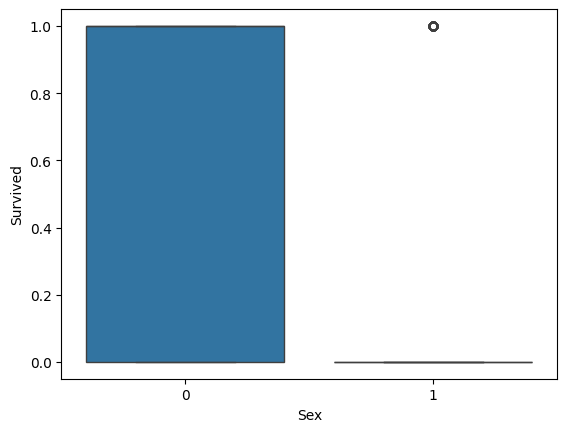

In [46]:
sns.boxplot(df, x="Sex", y="Survived")

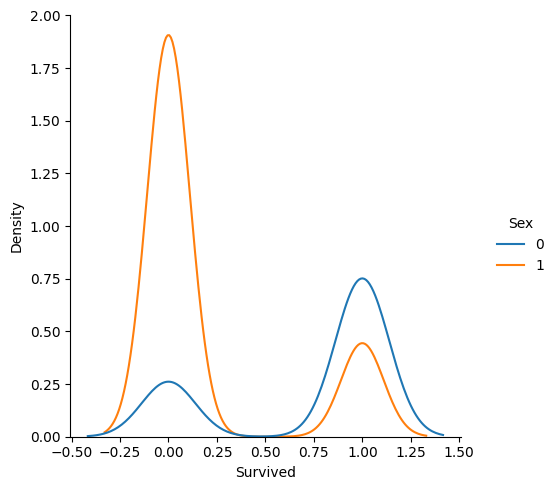

In [47]:
sns.displot(df, x= "Survived", hue="Sex", kind="kde")

<Axes: xlabel='Sex', ylabel='Survived'>

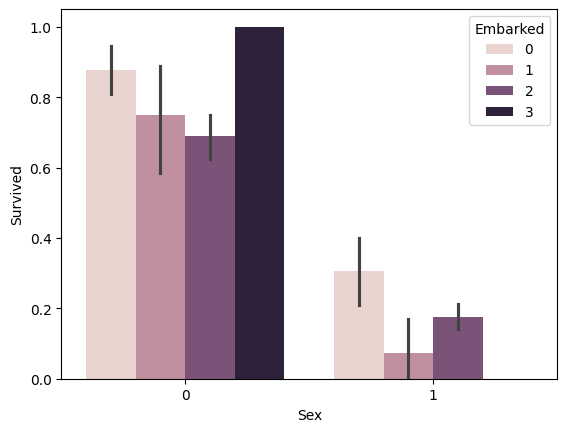

In [48]:
sns.barplot(df, x="Sex", y="Survived", hue="Embarked")

<Axes: xlabel='Age', ylabel='Survived'>

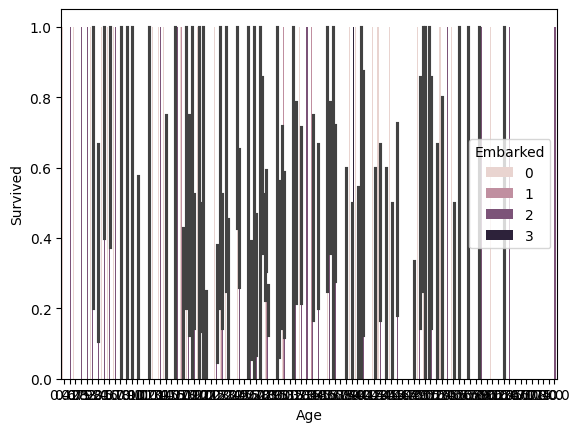

In [49]:
sns.barplot(df, x="Age", y="Survived", hue="Embarked")

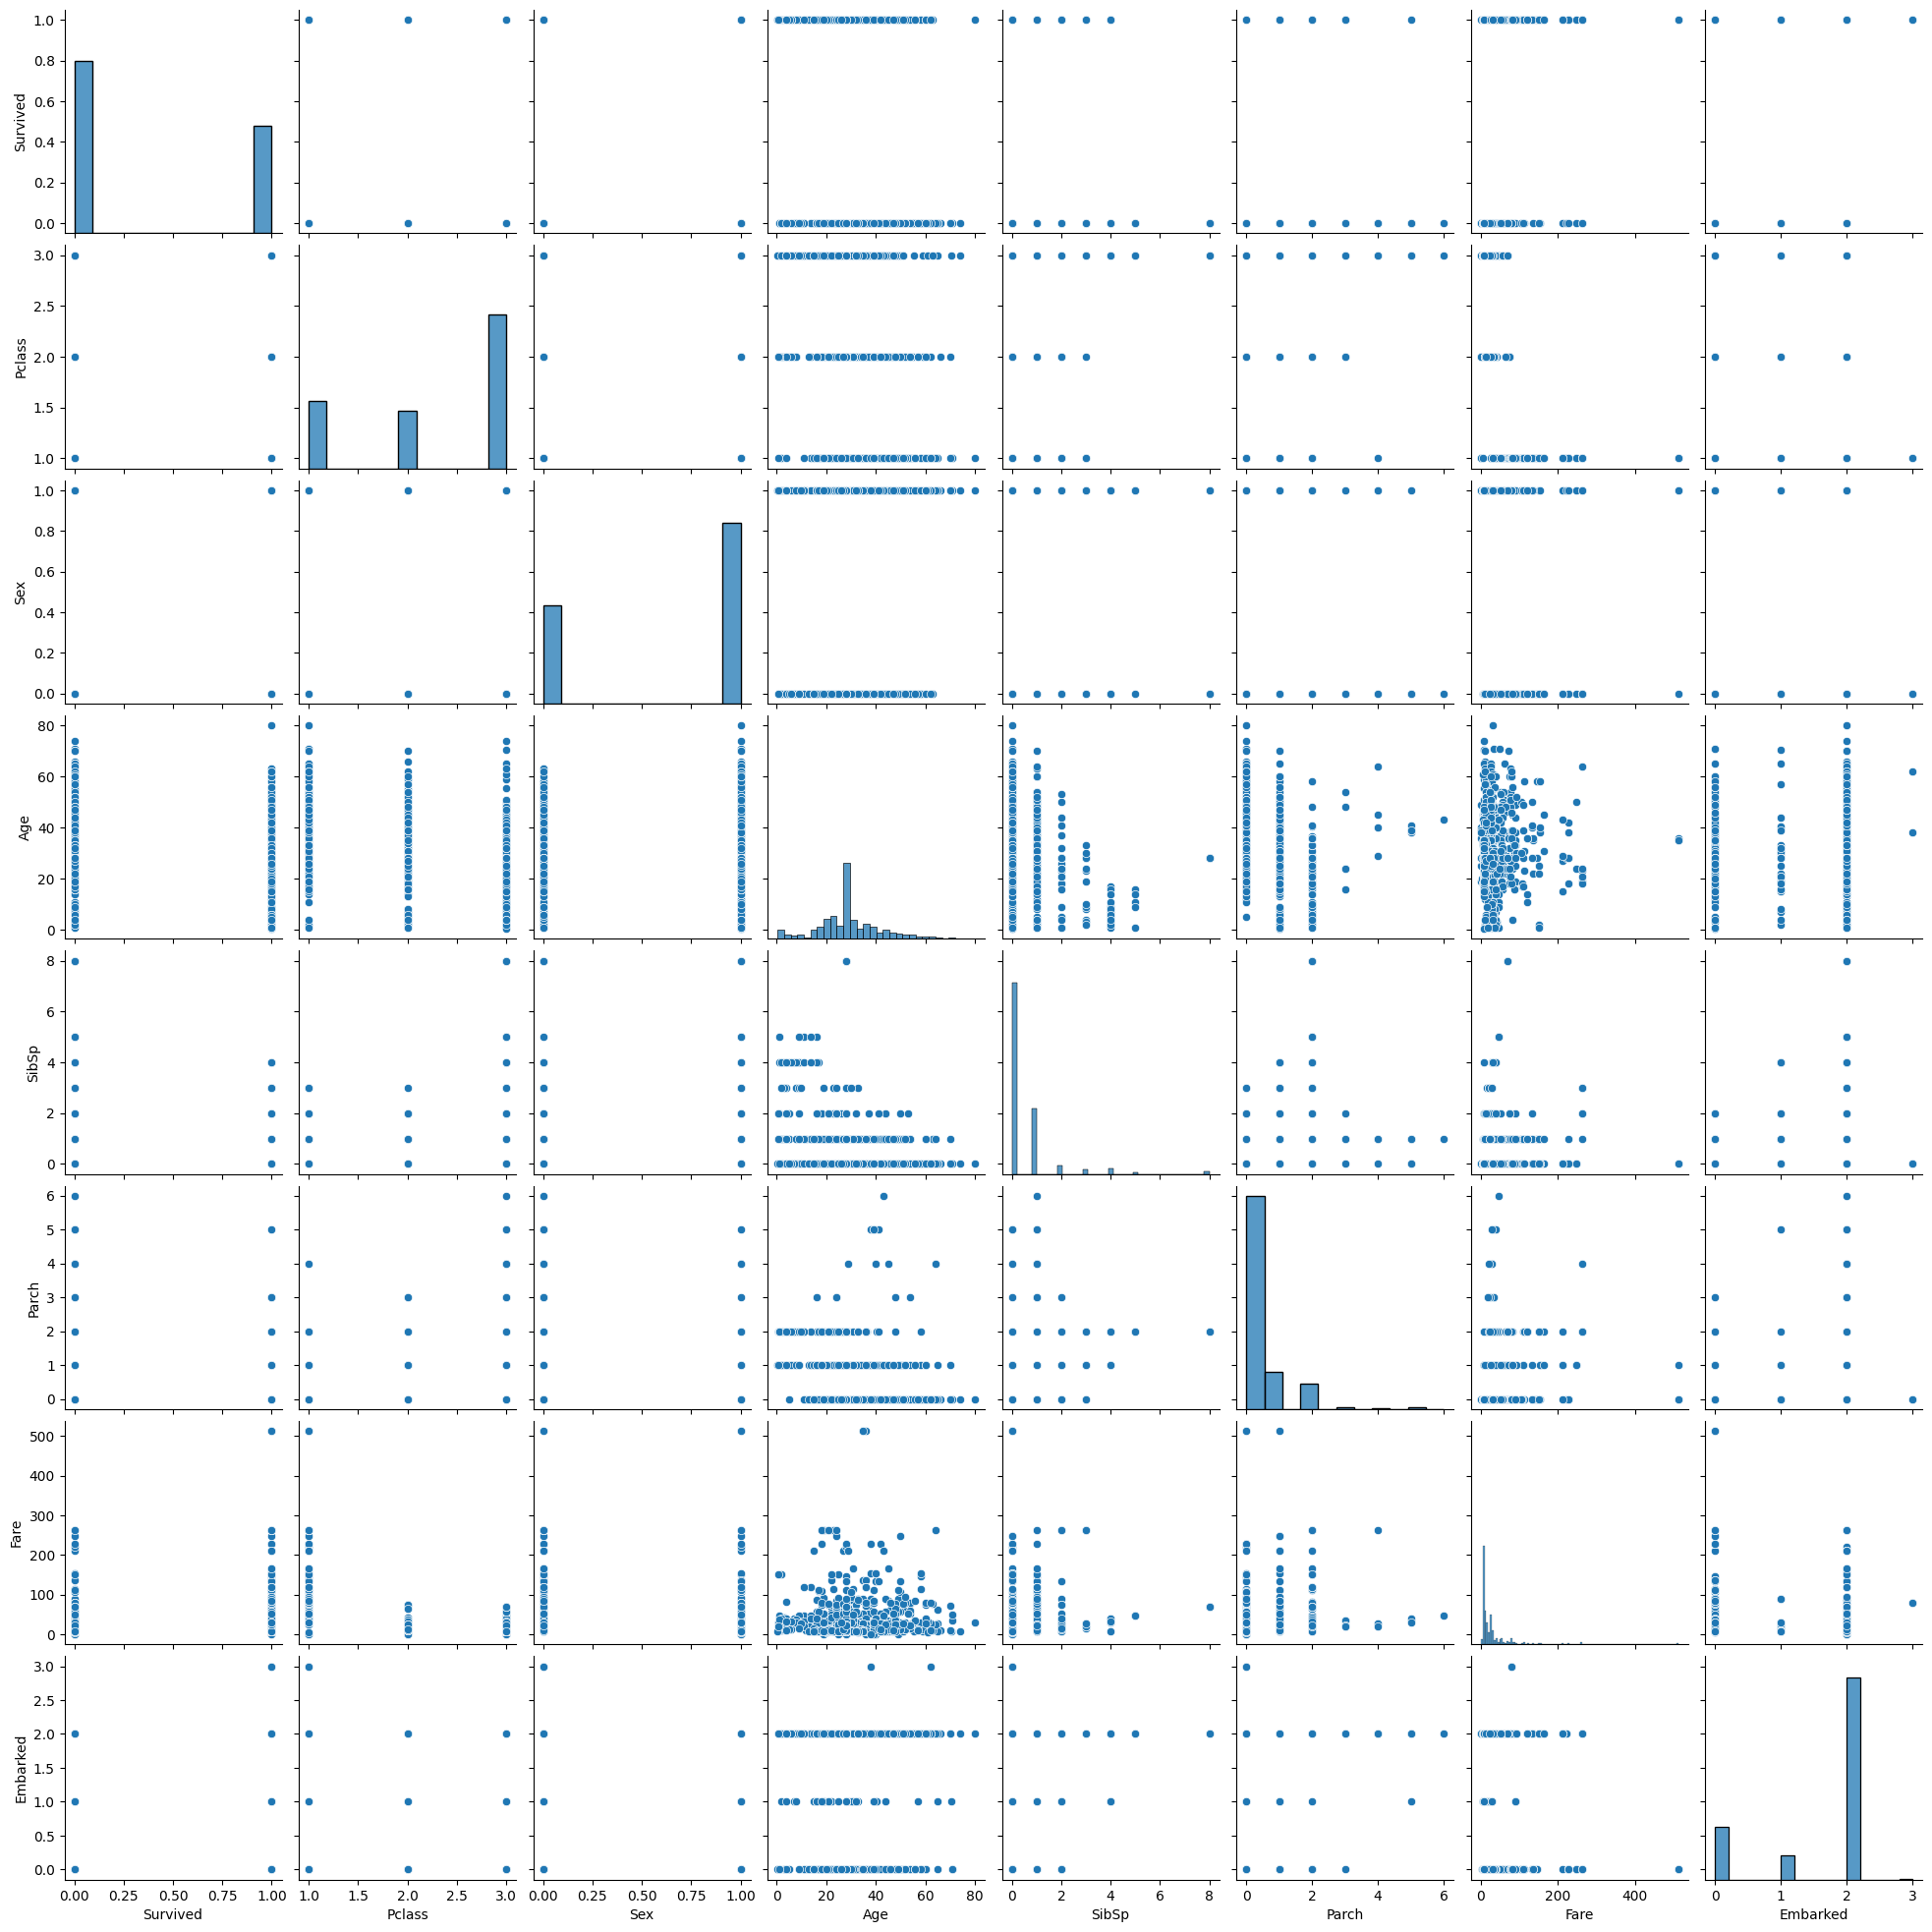

In [50]:
# we can analyse categorical and numerical variables of a data frame
sns.pairplot(df, vars=list(df.columns))

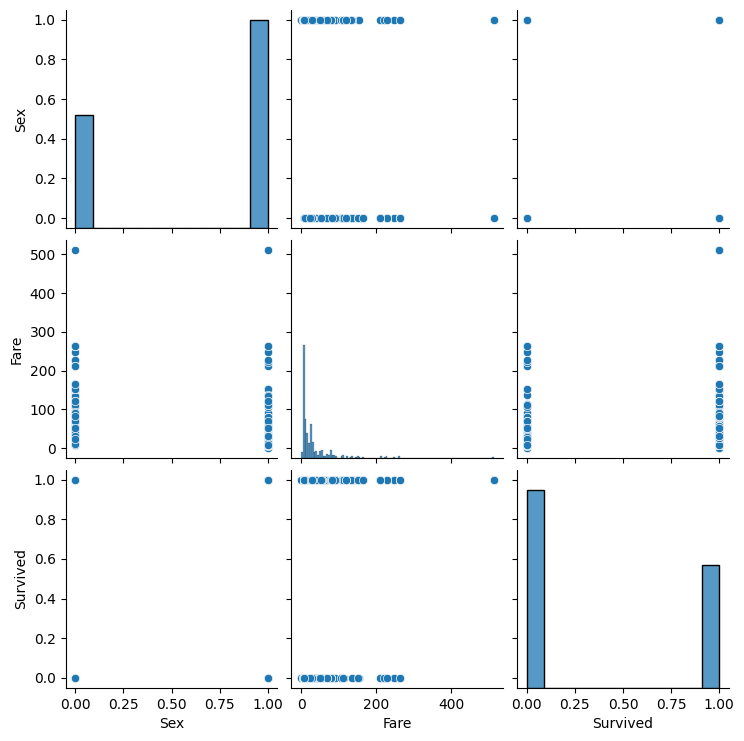

In [51]:
sns.pairplot(df, vars=['Sex', 'Fare', 'Survived'])

In [54]:
##3: Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])       # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<Axes: >

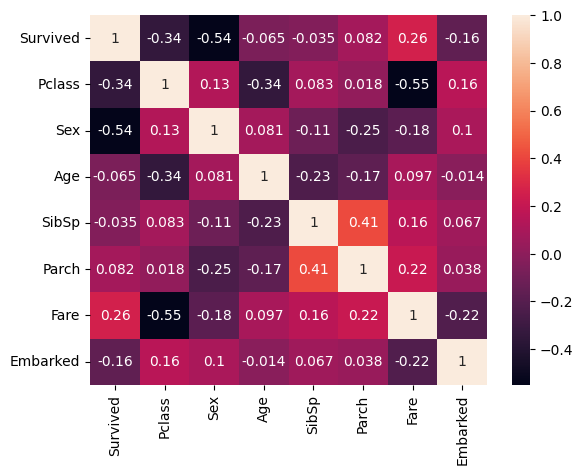

In [53]:
sns.heatmap(df.corr(), annot=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

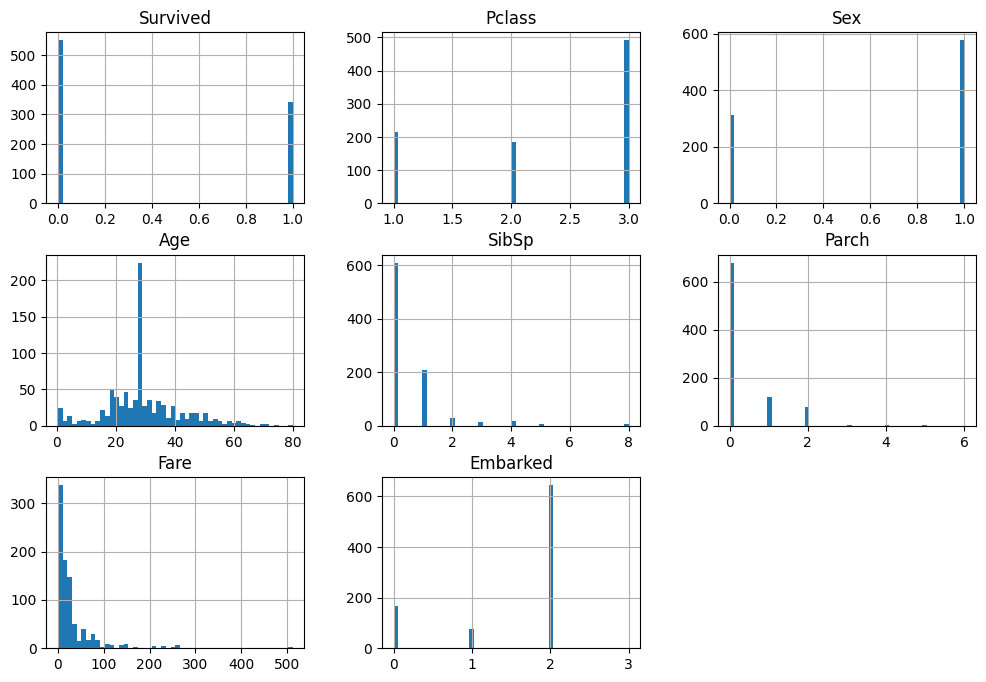

In [56]:
df.hist(bins=50, figsize=(12, 8))